In [5]:
import scipy.stats as scs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
S0 = 100
r = 0.05
sigma = 0.2
T = 1.
I = 100000
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * np.random.standard_normal(I))

In [10]:
# loss level
L = 0.5
# probability of default
p = 0.01

In [16]:
D = np.random.poisson(p * T, I)
# default can only happen once
D = np.where(D>1, 1, D)

# without default value of asset today is discounted average
np.exp(-r * T) * np.sum(ST) / I

100.02865844094029

In [18]:
# credit value at risk is discounted expected loss
CVaR = np.exp(-r * T) * np.sum(L * D * ST) / I
CVaR

0.51123028823844707

In [20]:
S0_CVA = np.exp(-r * T) * np.sum((1 - L * D) * ST) / I
S0_CVA

99.517428152701839

In [22]:
S0_adj = S0 - CVaR
S0_adj

99.488769711761549

In [23]:
# number of losses
np.count_nonzero(L*D*ST)

1021

(0.0, 175)

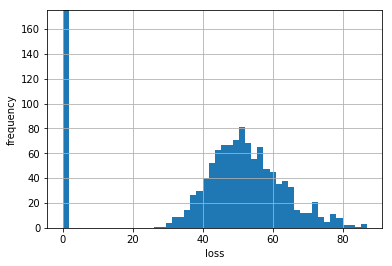

In [24]:
plt.hist(L*D*ST,bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.grid(True)
plt.ylim(ymax=175)

In [25]:
# now try with call options
K = 100.
hT = np.maximum(ST - K, 0)
C0 = np.exp(-r * T) * 1 / I * np.sum(hT)
C0

10.500121898354585

In [26]:
CVaR = np.exp(-r * T) * 1 / I * np.sum(L * D *hT)
CVaR

0.052807996023168775

In [27]:
C0_CVA = np.exp(-r * T) * 1/I * np.sum((1 - L * D) *hT)
C0_CVA

10.447313902331418

In [29]:
np.count_nonzero(L * D * hT) # number of losses

582

In [30]:
np.count_nonzero(D) # number of defaults

1021

In [31]:
I - np.count_nonzero(hT) # zero payoff

43947

(0.0, 350)

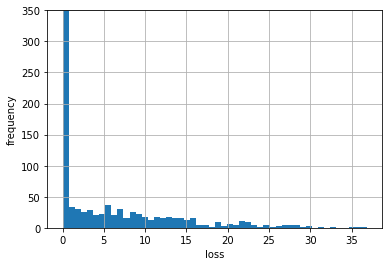

In [34]:
# distribution is different to index because there's no loss if the default happens whilst the option is OTM

plt.hist(L * D * hT, bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.grid(True)
plt.ylim(ymax=350)